In [317]:
#Chelsea Ajunwa
#phys_7332 hw1

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd



In [77]:
#Questions 2a & 2b
#(Iwrote this out in python to better understand how it works)


def edge_exchange(G,t,n_failed_attempts_allowed=1000):

    G_random=G.copy()
    edges = list(G_random.edges())

    n_failed_attempts =0
    s=0
    while s<t:
        if n_failed_attempts < n_failed_attempts_allowed:
            edge1_id = np.random.choice(list(range(len(edges))))
            i,j = edges[edge1_id]
            #print(i,j)
            edge1_id = np.random.choice(list(range(len(edges))))
            u,v = edges[edge1_id]
            #print(u,v)
            if i==u or i==v or j==u or j==v:
                print("self-loop error")
                n_failed_attempts+=1
                continue
            elif G_random.has_edge(i,v) or G_random.has_edge(j,u):
                print("edge exists error")
                n_failed_attempts+=1
                continue
            G_random.remove_edge(i,j)
            G_random.remove_edge(u,v)
            G_random.add_edge(i,v)
            G_random.add_edge(j,u)
            edges=list(G_random.edges())
            
            s+=1
            #print(n_failed_attempts)
        else:
            raise Exception("too many failed attempts")
            
            
    return G_random

In [ ]:
#testing function
G=nx.erdos_renyi_graph(15,0.3)

fig,ax = plt.subplots(1,2,figsize=(8,6))

nx.draw(G,ax=ax[0],with_labels=True)


G_random_try = edge_exchange(G,100)
nx.draw(G_random_try,ax=ax[1],with_labels=True)

In [83]:
#For Question 2c
def connected_nodes_list(G):



    nodes = list(G.nodes())

    connected_nodes = []
    
    for i in nodes:
        for j in nodes:
            if i!=j and nx.has_path(G,i,j):
                connected_nodes.append((i,j))

    connected_nodes = list(set(connected_nodes))
    return connected_nodes

    

In [87]:
#Question 2c

def edge_exchange_preserve_conn(G,t,n_failed_attempts_allowed=1000):
    """
    Bagrow & Ahn
    Basic edge exchange algorithm
    But preserves connectivity.
    If there was a path between two nodes in the original graph,
    there will also be such a path after edge exchange is run.

    G = graph
    t = number of exchanges
    n_failed_attempts_allowed = number of failed exchanges allowed before termination
    """
    G_random=G.copy()
    edges = list(G_random.edges())
    nodes = list(G_random.nodes())

    #lists all paths
    connected_nodes_orig = connected_nodes_list(G_random)

    

    n_failed_attempts =0
    s=0
    while s<t:
        if n_failed_attempts < n_failed_attempts_allowed:
            
            edge1_id = np.random.choice(list(range(len(edges))))
            i,j = edges[edge1_id]
            #print(i,j)
            edge1_id = np.random.choice(list(range(len(edges))))
            u,v = edges[edge1_id]
            #print(u,v)
            if i==u or i==v or j==u or j==v:
                #print("self-loop error")
                n_failed_attempts+=1
                continue
            elif G_random.has_edge(i,v) or G_random.has_edge(j,u):
                #print("edge exists error")
                n_failed_attempts+=1
                continue

            
            G_random.remove_edge(i,j)
            G_random.remove_edge(u,v)
            G_random.add_edge(i,v)
            G_random.add_edge(j,u)
            

            if connected_nodes_list(G_random) != connected_nodes_orig:
                #reverse 
                G_random.remove_edge(i,v)
                G_random.remove_edge(j,u)
                G_random.add_edge(i,j)
                G_random.add_edge(u,v)
                
                print("connectivity change reversed")
            
            edges=list(G_random.edges())
            s+=1
            #print(n_failed_attempts)
        else:
            raise Exception("too many failed attempts")
            
            
    return G_random

[(0, 1), (0, 7), (0, 9), (0, 13), (0, 14), (1, 4), (1, 5), (1, 6), (1, 13), (2, 5), (2, 7), (3, 4), (3, 5), (3, 8), (3, 9), (3, 11), (3, 12), (3, 14), (4, 6), (4, 8), (4, 10), (4, 11), (5, 7), (5, 9), (5, 13), (5, 14), (6, 10), (6, 11), (6, 12), (6, 14), (7, 10), (8, 12), (9, 11), (10, 12), (12, 13)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


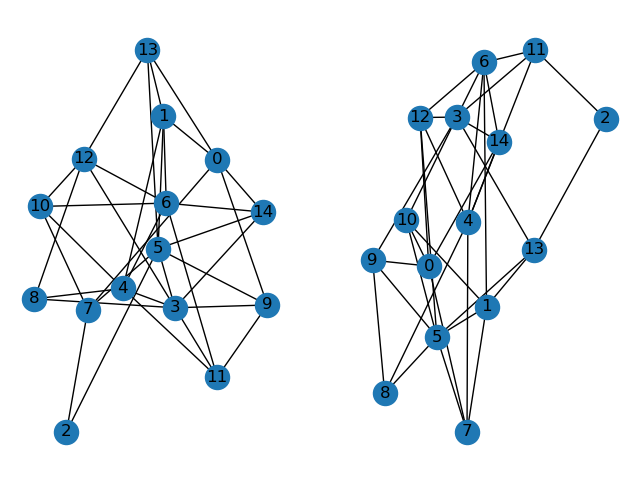

In [571]:
G=nx.erdos_renyi_graph(15,0.3)

fig,ax = plt.subplots(1,2,figsize=(8,6))

nx.draw(G,ax=ax[0],with_labels=True)
print(G.edges)
print(G.nodes)

G_random_try = edge_exchange_preserve_conn(G,100)
nx.draw(G_random_try,ax=ax[1],with_labels=True)

In [591]:
#Question 2d

def edge_exchange_binary(G,t,n_failed_attempts_allowed=1000):
    """
    Bagrow & Ahn
    Basic edge exchange algorithm
    But for binary attribute graphs.
    

    G = graph with edge weights 1 or -1 
    t = number of exchanges
    n_failed_attempts_allowed = number of failed exchanges allowed before termination
    

    
    """
    G_random=G.copy()
    edges = list(G_random.edges())

    n_failed_attempts =0
    s=0
    while s<t:
        if n_failed_attempts < n_failed_attempts_allowed:
            edge1_id = np.random.choice(list(range(len(edges))))
            i,j = edges[edge1_id]
            #print(i,j)
            edge1_id = np.random.choice(list(range(len(edges))))
            u,v = edges[edge1_id]
            #print(u,v)
            if i==u or i==v or j==u or j==v:
                print("self-loop error")
                n_failed_attempts+=1
                continue
            elif G_random.has_edge(i,v) or G_random.has_edge(j,u):
                print("edge exists error")
                n_failed_attempts+=1
                continue

            w1=G_random[i][j]["weight"]
            w2 =G_random[u][v]["weight"]

            init_attributes = set([w1,w2])
            G_random.remove_edge(i,j)
            G_random.remove_edge(u,v)
            G_random.add_edge(i,v,weight=w1)
            G_random.add_edge(j,u,weight=w2)
            end_attributes = set([G_random[i][v]["weight"],G_random[j][u]["weight"]])

            if init_attributes != end_attributes:
                print("init and end attributes do not match")
                G_random.remove_edge(i,v)
                G_random.remove_edge(j,u)
                G_random.add_edge(i,j,weight=w1)
                G_random.add_edge(u,v,weight=w2)                
            
            edges=list(G_random.edges())

 
            
            s+=1
            #print(n_failed_attempts)
        else:
            raise Exception("too many failed attempts")
            
            
    return G_random

[(0, 1), (0, 7), (0, 8), (0, 9), (0, 10), (1, 5), (1, 6), (1, 7), (1, 9), (2, 5), (2, 8), (3, 8), (3, 9), (4, 7), (4, 12), (5, 7), (6, 8), (6, 10), (6, 11), (6, 12), (7, 10), (7, 11), (7, 12), (8, 11), (8, 12), (10, 14), (11, 13), (11, 14), (13, 14)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
self-loop error
edge exists error
edge exists error
self-loop error


KeyError: 'weight'

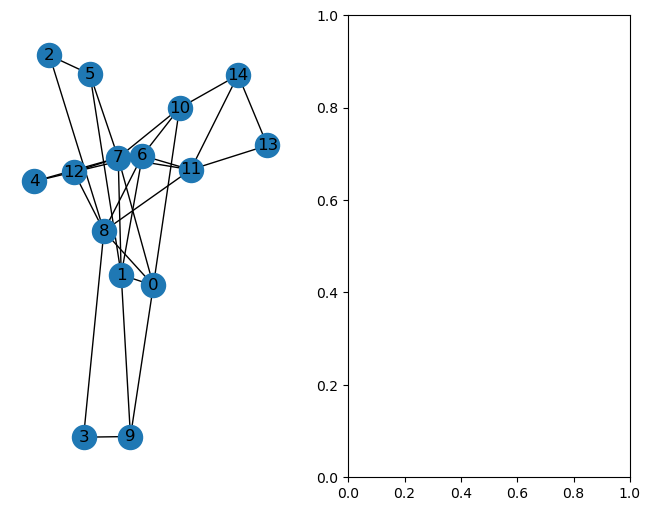

In [593]:
G=nx.erdos_renyi_graph(15,0.3)

fig,ax = plt.subplots(1,2,figsize=(8,6))

nx.draw(G,ax=ax[0],with_labels=True)
print(G.edges)
print(G.nodes)

G_random_try = edge_exchange_binary(G,100)
nx.draw(G_random_try,ax=ax[1],with_labels=True)


In [289]:
#Question 3a

#Write function to calculate betweenness centrality
def betweenness_centrality(G,node):
    """
    Calculates the betweenness centrality for a node in a graph.

    Betweenness centrality of a node is the sum of the fraction of shortest paths that pass through it.
    For each s and t nodes in graph, calculates proportion of shortest paths that pass through node
    of interest. These proportions are then summed across all combinations of s and t.

    Parameters
    ----------
    G: networkx.Graph
        The input graph on which betweenness centrality is calculated. 
    node:
        Node of the input graph that you would like to calculate the betweenness centrality

    Returns
    -------
    bc: float
        The betweenness centrality of the node.

    Example
    -------

    """
    nodes = list(G.nodes())
    
    ratio_sum = 0
    for s in nodes:
        #print(s)
        for t in nodes:
            if s !=t:
                #print(t)
                shortest_paths_st = list(nx.all_shortest_paths(G,s,t))
        
                num_sp = len(shortest_paths_st)
                paths_collapse = [item for sublist in shortest_paths_st for item in sublist]
                paths_collapse.remove(s)
                paths_collapse.remove(t)
    
                num_v_in_sp = paths_collapse.count(node)
    
                ratio = num_v_in_sp/num_sp
    
                ratio_sum = ratio_sum + ratio
    return ratio_sum
            
    
    

In [293]:
betweenness_centrality(G,14)

10.552380952380952

In [361]:
#Question 3b
#Write function to calculate betweenness centrality
#with error handling
def betweenness_centrality(G,node):
    """
    Calculates the betweenness centrality for a node in a graph.

    Betweenness centrality of a node is the sum of the fraction of shortest paths that pass through it.
    For each s and t nodes in graph, calculates proportion of shortest paths that pass through node
    of interest. These proportions are then summed across all combinations of s and t.

    Parameters
    ----------
    G: networkx.Graph
        The input graph on which betweenness centrality is calculated. Should be unweighted and 
        undirected.
    node:
        Node of the input graph that you would like to calculate the betweenness centrality

    Returns
    -------
    bc: float
        The betweenness centrality of the node.

    Example
    -------

    """
    #Making sure graph is networkx object
    if isinstance(G,nx.classes.graph.Graph)==False:
        raise Exception("Graph must be networkx object")

    #Making sure node of interest is in graph
    nodes = list(G.nodes())
    if node not in nodes:
        raise Exception("Node not in graph")

    #Making sure graph has connectivity
    edges = list(G.edges())
    if edges==[]:
        raise Exception("No connectivity")
    
    ratio_sum = 0
    for s in nodes:
        #print(s)
        for t in nodes:
            if s !=t:
                #print(t)
                shortest_paths_st = list(nx.all_shortest_paths(G,s,t))
        
                num_sp = len(shortest_paths_st)
                
                paths_collapse = [item for sublist in shortest_paths_st for item in sublist]
                paths_collapse.remove(s)
                paths_collapse.remove(t)
    
                num_v_in_sp = paths_collapse.count(node)

                try:
                    ratio = num_v_in_sp/num_sp
                except:
                    print(f"No shortest paths between {s} and {t}. Continuing")
                    continue
    
                ratio_sum = ratio_sum + ratio
    return ratio_sum
            
    
    

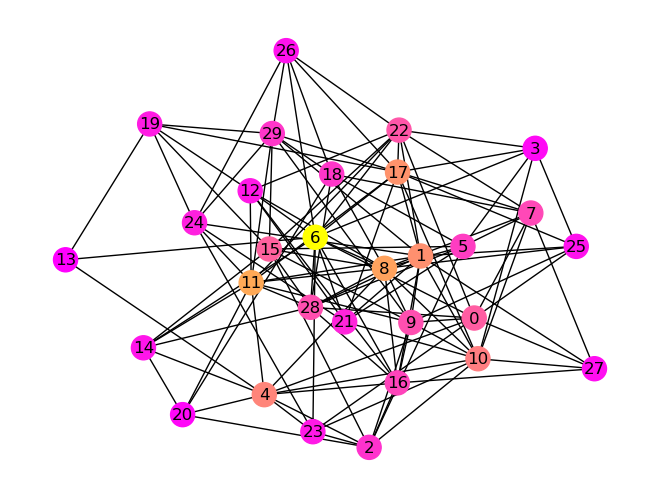

In [595]:
#testing
num_nodes=30
G=nx.erdos_renyi_graph(num_nodes,0.3)




bcs = []
for node in range(num_nodes):
 
    bcs.append(betweenness_centrality(G,node))

carac = pd.DataFrame({'ID':list(G.nodes()),'bcs':bcs})
carac=carac.set_index('ID')
carac=carac.reindex(G.nodes())

nx.draw(G,with_labels=True,node_color=carac['bcs'].astype(int),cmap='spring')
    

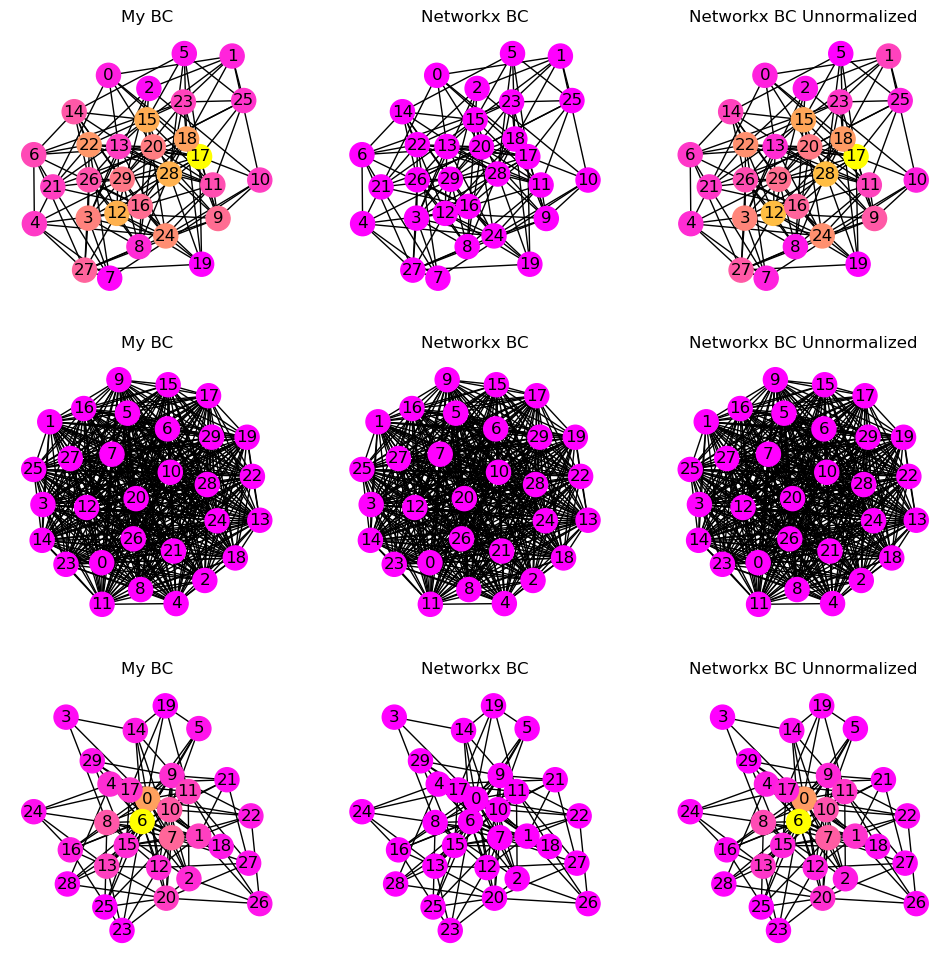

In [597]:
#Question 3c

fig,ax = plt.subplots(3,3,figsize=(12,12))
num_nodes=30

methods = [betweenness_centrality,nx.betweenness_centrality]

Graphs = [nx.erdos_renyi_graph(num_nodes,0.3),nx.complete_graph(num_nodes),nx.barabasi_albert_graph(num_nodes,5)]

for i,G in enumerate(Graphs):

    pos = nx.spring_layout(G)
    
    
    
    bcs = []
    for node in range(num_nodes):
     
        bcs.append(betweenness_centrality(G,node))
    
    carac = pd.DataFrame({'ID':list(G.nodes()),'bcs':bcs})
    #print(carac)
    carac=carac.set_index('ID')
    carac=carac.reindex(G.nodes())
    
    nx.draw(G,with_labels=True,node_color=carac['bcs'].astype(int),cmap='spring',pos=pos,ax=ax[i,0])
    ax[i,0].set_title("My BC")
    
    bcs = []
    for node in range(num_nodes):
     
        bcs.append(nx.betweenness_centrality(G)[node])
    
    carac = pd.DataFrame({'ID':list(G.nodes()),'bcs':bcs})
    #print(carac)
    carac=carac.set_index('ID')
    carac=carac.reindex(G.nodes())
    
    nx.draw(G,with_labels=True,node_color=carac['bcs'].astype(int),cmap='spring',pos=pos,ax=ax[i,1])
    ax[i,1].set_title("Networkx BC")
    
    bcs = []
    for node in range(num_nodes):
     
        bcs.append(nx.betweenness_centrality(G,normalized=False)[node])
    
    carac = pd.DataFrame({'ID':list(G.nodes()),'bcs':bcs})
    #print(carac)
    carac=carac.set_index('ID')
    carac=carac.reindex(G.nodes())
    
    nx.draw(G,with_labels=True,node_color=carac['bcs'].astype(int),cmap='spring',pos=pos,ax=ax[i,2])
    ax[i,2].set_title("Networkx BC Unnormalized")
    
plt.savefig('bc_graphs.png')

In [509]:
def centrality_test(centrality_function):
    """
    Tests robustness of a given centrality function.

    Four test cases:
    Graph with no edges (empty).
    Graph with no edges and no nodes (null).
    Directed graph.
    Path graph.
    

    Parameters
    ----------
    centrality function:
        Function that calculates the centrality of a node in a graph. For example, 
        my betweenness_centrality function.

    Returns
    -------
    robustness_report: string
        Report with results from robustness testing of centrality function with test edge cases.

        

    Example
    -------
    bc_test(betweenness_centrality)
    """
    
    num_nodes = 30

    
    no_connectivity_graph = nx.empty_graph(num_nodes)
    path_graph = nx.path_graph(num_nodes)
    null_graph = nx.null_graph()
    directed_graph = nx.gn_graph(num_nodes)

    test_graphs = [no_connectivity_graph,path_graph,null_graph,directed_graph]
    names = ["no_connectivity_graph","path_graph","null_graph","directed_graph"]

    failures = {name: [] for name in names}
    for graph_num,graph in enumerate(test_graphs):
        graph_name = names[graph_num]
        #testing null graph
        if len(graph.nodes())==0:
            try:
                centrality_function(graph,None)
            except Exception:
                failures[graph_name].append(f"failure -- no nodes")
        else:

            #testing graphs with nodes       
            for node in list(graph.nodes()):
                try:
                    centrality_function(graph,node)
                    failures[graph_name].append("success")
                except Exception as e:
                    
                    failures[graph_name].append(f"failure for node {node}: {e}")
            


    for name in names:
        if len(failures[name])>0:
            print(f"""Errors for {name}
            {failures[name]}

            """)
        else:
            print(f"{name} ran successfully")
        
    return None


    
    



    

In [511]:
centrality_test(betweenness_centrality)

Errors for no_connectivity_graph
            ['failure for node 0: No connectivity', 'failure for node 1: No connectivity', 'failure for node 2: No connectivity', 'failure for node 3: No connectivity', 'failure for node 4: No connectivity', 'failure for node 5: No connectivity', 'failure for node 6: No connectivity', 'failure for node 7: No connectivity', 'failure for node 8: No connectivity', 'failure for node 9: No connectivity', 'failure for node 10: No connectivity', 'failure for node 11: No connectivity', 'failure for node 12: No connectivity', 'failure for node 13: No connectivity', 'failure for node 14: No connectivity', 'failure for node 15: No connectivity', 'failure for node 16: No connectivity', 'failure for node 17: No connectivity', 'failure for node 18: No connectivity', 'failure for node 19: No connectivity', 'failure for node 20: No connectivity', 'failure for node 21: No connectivity', 'failure for node 22: No connectivity', 'failure for node 23: No connectivity', 'fai

In [ ]:
#Question 4 
import requests
from bs4 import BeautifulSoup

catalog_res = requests.get('https://catalog.northeastern.edu/course-descriptions/')
catalog_html = catalog_res.text
soup = BeautifulSoup(catalog_html)
print(soup.prettify())

In [521]:
#For question 5
#From class

def degree_preserving_randomization(G, n_iter=1000):
    """
    Perform degree-preserving randomization on a graph.

    Degree-preserving randomization, also known as edge swapping or rewiring, 
    is a method for creating randomized versions of a graph while preserving 
    the degree distribution of each node. This is achieved by repeatedly 
    swapping pairs of edges in the graph, ensuring that the degree (number of 
    edges connected) of each node remains unchanged. The result is a graph 
    with the same degree distribution but a randomized edge structure, which 
    can be used as a null model to compare with the original network.

    Parameters
    ----------
    G : networkx.Graph
        The input graph to be randomized. The graph can be directed or 
        undirected, but it must be simple (i.e., no self-loops or parallel edges).

    n_iter : int, optional (default=1000)
        The number of edge swap iterations to perform. A higher number of 
        iterations leads to more randomization, but the degree distribution 
        remains preserved. Typically, the number of iterations should be 
        proportional to the number of edges in the graph for sufficient 
        randomization.

    Returns
    -------
    G_random : networkx.Graph
        A randomized graph with the same degree distribution as the original 
        graph `G`, but with a shuffled edge structure.

    Notes
    -----
    - This method works by selecting two edges at random, say (u, v) and (x, y), 
      and attempting to swap them to (u, y) and (x, v) (or (u, x) and (v, y)), 
      ensuring that no self-loops or parallel edges are created in the process.
    - Degree-preserving randomization is particularly useful for creating null 
      models in network analysis, as it allows for the investigation of whether 
      specific network properties (e.g., clustering, path lengths) are a result 
      of the network's structure or just its degree distribution.
    - The effectiveness of randomization depends on the number of iterations 
      (`n_iter`). As a rule of thumb, using about 10 times the number of edges 
      in the graph for `n_iter` often provides sufficient randomization.
    
    Example
    -------
    >>> import networkx as nx
    >>> G = nx.erdos_renyi_graph(10, 0.5)
    >>> G_random = degree_preserving_randomization(G, n_iter=100)
    
    Citations
    ---------
    Milo, R., Shen-Orr, S., Itzkovitz, S., Kashtan, N., Chklovskii, D., & Alon, U. (2002). 
    Network motifs: simple building blocks of complex networks. *Science*, 298(5594), 824-827.
    
    Maslov, S., & Sneppen, K. (2002). Specificity and stability in topology of protein networks. 
    *Science*, 296(5569), 910-913.
    """

    G_random = G.copy()
    edges = list(G_random.edges())
    num_edges = len(edges)

    for _ in range(n_iter):
        # Select two random edges (u, v) and (x, y)
        edge1_id = np.random.choice(list(range(len(edges))))
        u, v = edges[edge1_id]
        edge2_id = np.random.choice(list(range(len(edges))))
        x, y = edges[edge2_id]

        # Avoid selecting the same edge pair or creating self-loops
        if len({u, v, x, y}) == 4:
            # Swap the edges with some probability
            if np.random.rand() > 0.5:
                # Swap (u, v) with (u, y) and (x, v)
                if not (G_random.has_edge(u, y) or G_random.has_edge(x, v)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, y)
                    G_random.add_edge(x, v)
            else:
                # Swap (u, v) with (u, x) and (v, y)
                if not (G_random.has_edge(u, x) or G_random.has_edge(v, y)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, x)
                    G_random.add_edge(v, y)

        # Update edge list after changes
        edges = list(G_random.edges())


    return G_random

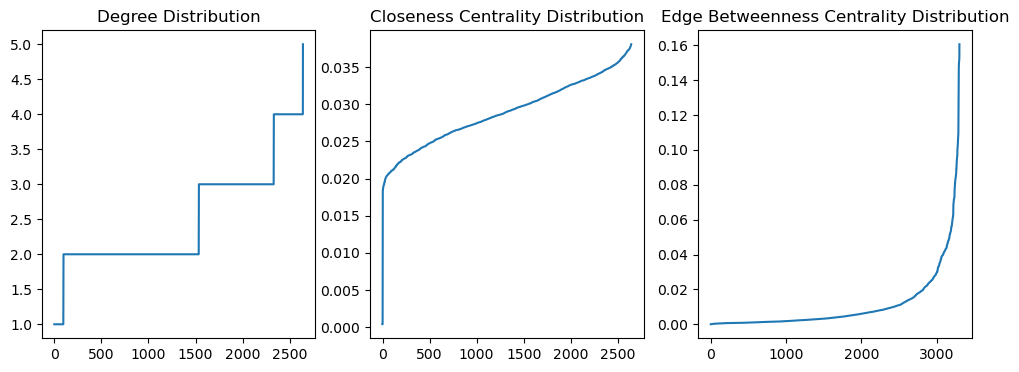

In [561]:
#Question 5

from scipy.io import mmread

fig,ax=plt.subplots(1,3,figsize=(12,4))

#Minnesota road graph
sparse_matrix = mmread('road-minnesota.mtx')
G=nx.Graph(sparse_matrix)
#nx.draw(G)

degrees = list(dict(G.degree()).values())

ax[0].plot(sorted(degrees))
ax[0].set_title("Degree Distribution")

closeness_centralities = nx.closeness_centrality(G)
ax[1].plot(sorted(list(closeness_centralities.values())))
ax[1].set_title("Closeness Centrality Distribution")

edge_bc = nx.edge_betweenness_centrality(G)
ax[2].plot(sorted(list(edge_bc.values())))
ax[2].set_title("Edge Betweenness Centrality Distribution")

plt.savefig('MN_graph_distributions.png')

In [ ]:
random_G = degree_preserving_randomization(G, n_iter=10000)

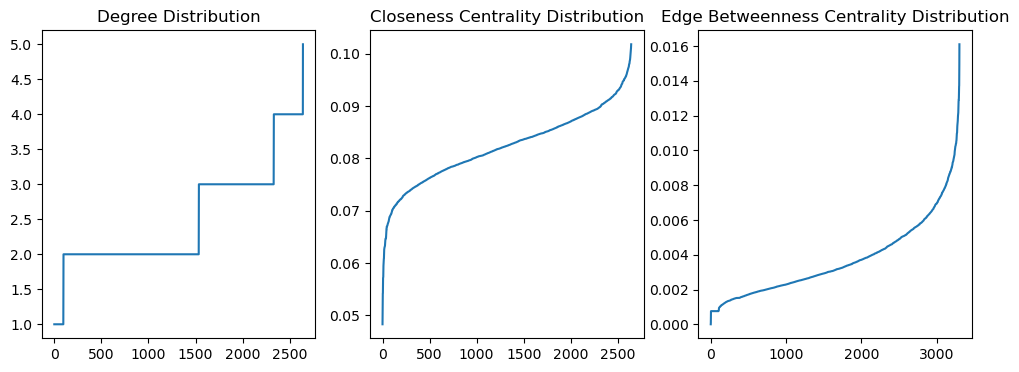

In [565]:

#null model (rewired to preserve degree distribution)
fig,ax=plt.subplots(1,3,figsize=(12,4))



degrees = list(dict(random_G.degree()).values())

ax[0].plot(sorted(degrees))
ax[0].set_title("Degree Distribution")

closeness_centralities = nx.closeness_centrality(random_G)
ax[1].plot(sorted(list(closeness_centralities.values())))
ax[1].set_title("Closeness Centrality Distribution")

edge_bc = nx.edge_betweenness_centrality(random_G)
ax[2].plot(sorted(list(edge_bc.values())))
ax[2].set_title("Edge Betweenness Centrality Distribution")

plt.savefig('random_graph_distributions.png')


In [559]:
plt.savefig('random_graph_distributions.png')

<Figure size 640x480 with 0 Axes>